# Experiment Analysis: Failure Proportion w.r.t. Censoring Baseline

**Purpose**:
As suggested by the title, analyze the outputs of the experiment on the impact of censoring on model training and model performance

**Raytheon Technologies proprietary**

Export controlled - see license file

In [1]:
from json import loads as read_json_string
from pathlib import Path

from pandas import read_csv, DataFrame, MultiIndex

In [10]:
experiment_root = Path('outputs-2022-02-05-failure-exp-03')
list(experiment_root.iterdir())

[PosixPath('outputs-2022-02-05-failure-exp-03/log.log'),
 PosixPath('outputs-2022-02-05-failure-exp-03/failure_portioning_experiment-2022-02-06T00:36:16.csv')]

In [11]:
experiment_outputs = read_csv('outputs-2022-02-05-failure-exp-03/failure_portioning_experiment-2022-02-06T00:36:16.csv')

In [12]:
experiment_outputs

,RMSE,MSE,MFE,SMAPE,SMPE,Prediction_count,Real_count,NaN_count,loss_train_total,loss_train_max,loss_train_min,loss_val_total,loss_val_max,loss_val_min,completion_time,training_seconds,failure_portion,losses_json
0,46.903128,2199.903463,38.492182,0.846617,-0.832796,12489,12489,0,840.108747,15.665201,1.192900,1382.658272,5.625805,1.956796,2022-02-06T00:52:05,475.748262,0.25,"{""training_losses"": [15.665201158710547, 9.653..."
1,42.720927,1825.077612,32.341862,0.597430,-0.514690,12489,12489,0,949.146021,19.698947,1.125930,1316.207784,8.129009,2.053203,2022-02-06T00:59:58,471.800685,0.25,"{""training_losses"": [19.698947450269742, 10.64..."
2,94.220930,8877.583634,-86.505717,0.542455,0.542232,12489,12489,0,971.304829,14.719076,1.258137,1120.987281,4.614907,1.762193,2022-02-06T01:07:53,474.485075,0.25,"{""training_losses"": [14.719075886038356, 8.387..."
3,42.209122,1781.609974,32.702629,0.604073,-0.525703,12489,12489,0,1190.687913,284.445540,1.207416,1314.959393,24.509525,1.988418,2022-02-06T01:15:45,470.519897,0.25,"{""training_losses"": [284.4455403483589, 62.573..."
4,496.178697,246193.299769,-493.714127,0.862267,0.862267,12489,12489,0,1649.000108,88.989373,2.292435,1423.583975,9.523800,2.540691,2022-02-06T01:25:17,544.364164,0.50,"{""training_losses"": [88.9893725376124, 21.1371..."
5,41.615847,1731.878726,31.659801,0.585198,-0.491904,12489,12489,0,1704.657567,164.187184,2.269878,1111.556517,14.284523,1.854028,2022-02-06T01:34:22,543.875110,0.50,"{""training_losses"": [164.18718351313336, 28.04..."
6,488.561311,238692.154761,-486.218155,0.860836,0.860836,12489,12489,0,1576.516437,20.219876,2.366519,1383.866894,4.961513,2.567659,2022-02-06T01:43:28,544.770645,0.50,"{""training_losses"": [20.219875761197617, 12.21..."
7,383.514426,147083.314856,-381.642696,0.830112,0.830112,12489,12489,0,1567.840233,19.010674,2.242051,1192.491372,5.080667,1.899572,2022-02-06T01:52:36,546.975287,0.50,"{""training_losses"": [19.010673763133006, 11.39..."
8,183.336752,33612.364565,-180.631048,0.706913,0.706913,12489,12489,0,2286.397786,255.480896,2.971550,1056.234278,22.786753,1.771447,2022-02-06T02:03:35,632.109876,0.75,"{""training_losses"": [255.48089592862527, 51.14..."
9,292.307377,85443.602891,-290.515092,0.790873,0.790873,12489,12489,0,1929.775702,23.372069,2.930193,1011.672602,5.213138,1.801210,2022-02-06T02:14:07,631.188389,0.75,"{""training_losses"": [23.372068618587388, 14.64..."


In [21]:
feature_sets = {
    "loss_aggregates": [n for n in experiment_outputs.columns if n.startswith('loss_')]
}

experiment_loss_aggregates = experiment_outputs[feature_sets['loss_aggregates'] + ['failure_portion']]

### Loss Trends

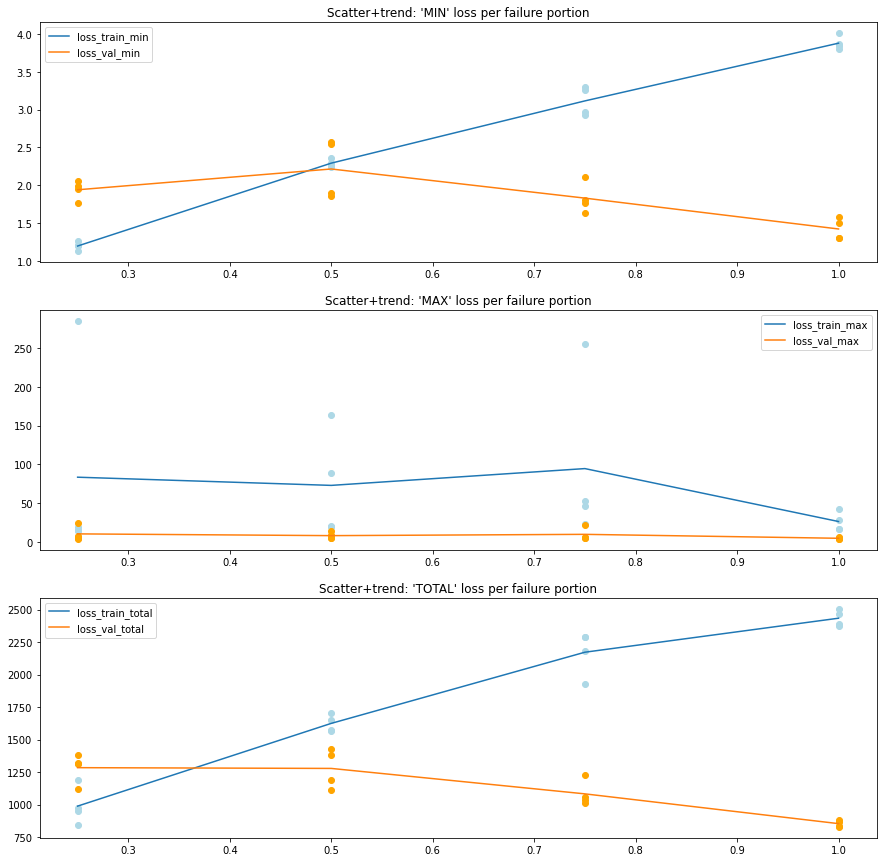

In [46]:
def plot_scatter_losses():
    agged = (experiment_loss_aggregates.groupby('failure_portion'))
    
    fig, ax = plt.subplots(nrows=3,figsize=(15, 15))
    
    for failure_proportion, losses in agged:
        failure_axis = [failure_proportion] * len(losses) # gotta be the same x-value len(losses) times over, because matplotlib doesn't broadcast
        ax[0].scatter(failure_axis, losses['loss_train_min'], color='lightblue')
        ax[0].scatter(failure_axis, losses['loss_val_min'], color='orange')

        ax[1].scatter(failure_axis, losses['loss_train_max'], color='lightblue')
        ax[1].scatter(failure_axis, losses['loss_val_max'], color='orange')

        ax[2].scatter(failure_axis, losses['loss_train_total'], color='lightblue')
        ax[2].scatter(failure_axis, losses['loss_val_total'], color='orange')


    xs_ = [failure_prop for failure_prop, _ in agged]
    
    for summ_stat, ax in zip('min max total'.split(), ax):
        ys_train = [losses[f'loss_train_{summ_stat}'].mean() for failure_proportion, losses in agged]
        ys_val = [losses[f'loss_val_{summ_stat}'].mean() for failure_proportion, losses in agged]
        ax.plot(xs_, ys_train, label=f'loss_train_{summ_stat}')
        ax.plot(xs_, ys_val, label=f'loss_val_{summ_stat}')
        ax.set_title(f"Scatter+trend: '{summ_stat.upper()}' loss per failure portion")
        ax.legend()
    
    plt.show()
plot_scatter_losses()

### Error Trends

In [76]:
experiment_outputs["MFE"].where(experiment_outputs["MFE"] > 0, -experiment_outputs["MFE"])

0      38.492182
1      32.341862
2      86.505717
3      32.702629
4     493.714127
5      31.659801
6     486.218155
7     381.642696
8     180.631048
9     290.515092
10    121.917443
11    379.057502
12      1.978090
13      0.408019
14     14.325235
15      8.311881
Name: MFE, dtype: float64

In [79]:
def abs_min(x): return x.abs().min()# * x.where(x < 0, -1).where(x >=0, 1)

In [86]:
experiment_outputs.groupby('failure_portion')['MSE RMSE MFE SMAPE SMPE'.split()].agg(abs_min)

,MSE,RMSE,MFE,SMAPE,SMPE
failure_portion,,,,,
0.25,1781.609974,42.209122,32.341862,0.542455,0.514690
0.50,1731.878726,41.615847,31.659801,0.585198,0.491904
0.75,15899.930583,126.094927,121.917443,0.623920,0.623760
1.00,713.636032,26.713967,0.408019,0.313786,0.013850


In [95]:
import numpy as np

In [ ]:
def find_best_performing_error_metrics(
    df: DataFrame,
    selected_columns = 'MSE RMSE MFE SMAPE SMPE'.split()
) -> DataFrame:

    grouped = list(df.groupby('failure_portion')[selected_columns])

    out = dict()
    for group, sub_df in grouped:
        sub_df = sub_df[selected_columns]
        abs_min_df = sub_df.abs().min(axis=0)
        index_df = (abs_min_df == sub_df.abs())
        # display(index_df)
        selected = sub_df.where(index_df, 50)
        # display(selected)
        selection = np.nansum(selected[selected != 50], axis=0)
        out[group] = selection

    return (
        DataFrame(out).T
        .rename(columns=lambda i: selected_columns[i])
        .rename_axis('failure_proportion')
    )

find_best_performing_error_metrics(experiment_outputs)

## Surface-level findings

From this table, we can see that:


## Cohort analysis

Let's take a closer look at each of these groups

In [13]:
grouped = experiment_outputs.groupby('failure_portion')

In [14]:
grouped.indices

{0.25: array([0, 1, 2, 3]),
 0.5: array([4, 5, 6, 7]),
 0.75: array([ 8,  9, 10, 11]),
 1.0: array([12, 13, 14, 15])}

### Learning Curves

len(cohort_loss_curves) = 4
len(cohort_loss_curves) = 4
len(cohort_loss_curves) = 4
len(cohort_loss_curves) = 4


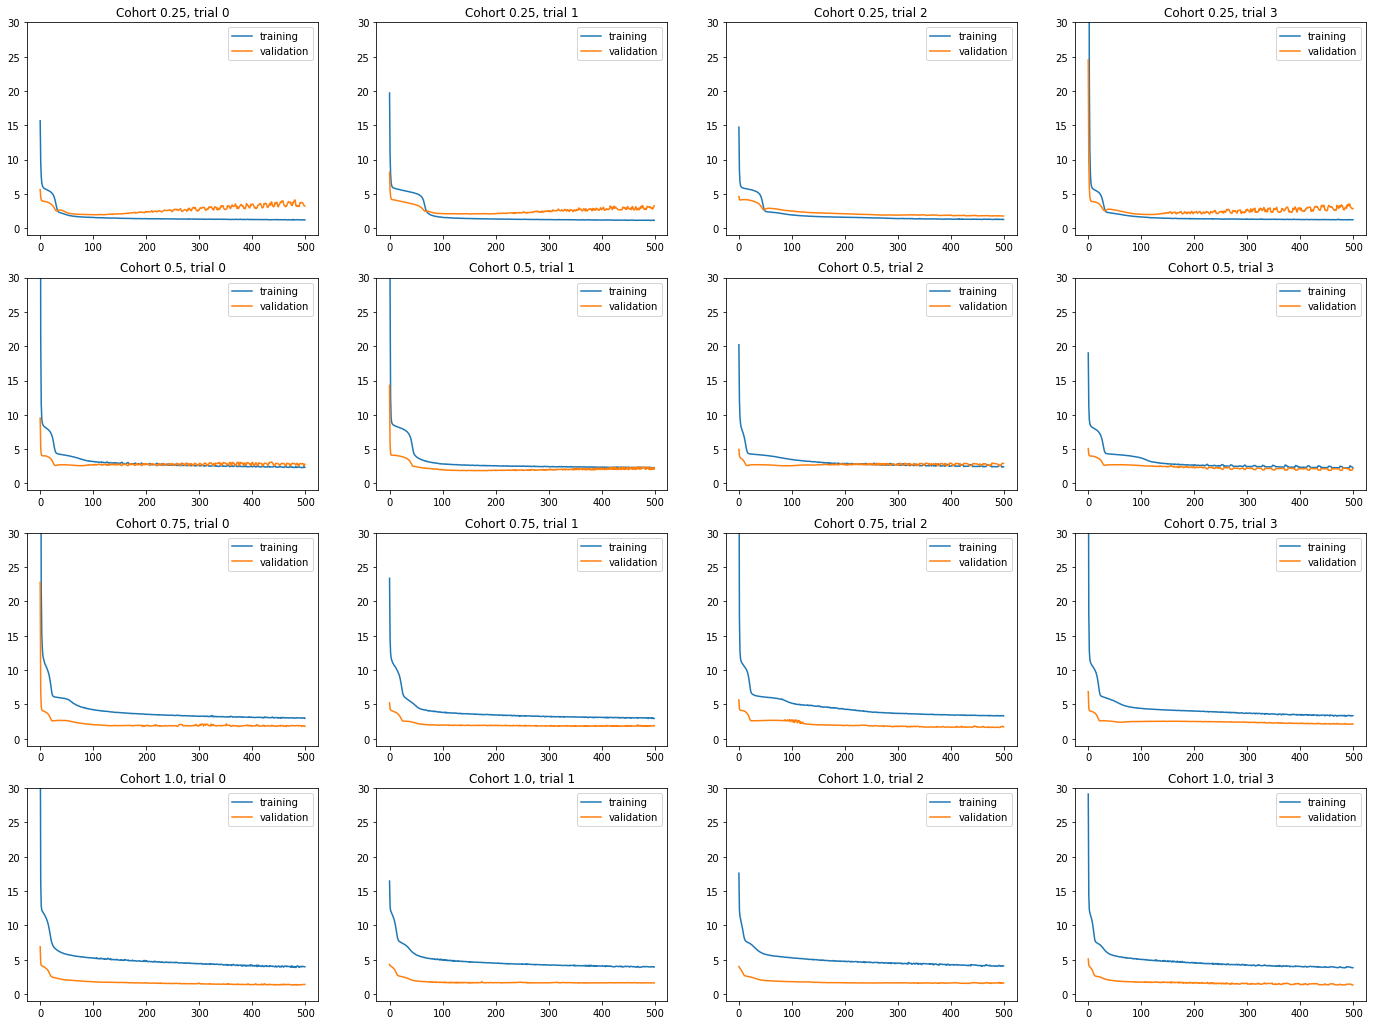

In [17]:
from matplotlib import pyplot as plt

def visualize_losses():
    cohorts = list(grouped)
    
    fig, axes = plt.subplots(len(cohorts), len(cohorts[0][1]), figsize=(24, 18))
    
    for i_cohort, (cohort_id, cohort_df) in enumerate(cohorts):
        cohort_loss_curves = cohort_df['losses_json'].map(read_json_string)
        print(f"{len(cohort_loss_curves) = }")
        
        for i_curve, curve_pair in enumerate(cohort_loss_curves):

            ax = axes[i_cohort, i_curve]
            ax.plot(curve_pair['training_losses'], label='training')
            ax.plot(curve_pair['validation_losses'], label='validation')
            ax.set_title(f"Cohort {cohort_id}, trial {i_curve}")
            
            ax.set_ylim(-1, 30)
            ax.legend()
        
visualize_losses()

#### Analysis
At lower portions of failure availability, we see the typical "overfitting to the training set" phenomenon common in deep learning.

With more data, we actually see training loss plateau greatest lower-bound $\approx 5.0$, while the glb for validation loss is $\approx 1.0$.
- It gives encouragement for increasing training duration to see if we may also see something like [Deep Double Descent](https://openai.com/blog/deep-double-descent/)
  in failure-lite data sets

failure_portion
0.25    AxesSubplot(0.125,0.125;0.775x0.755)
0.50    AxesSubplot(0.125,0.125;0.775x0.755)
0.75    AxesSubplot(0.125,0.125;0.775x0.755)
1.00    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

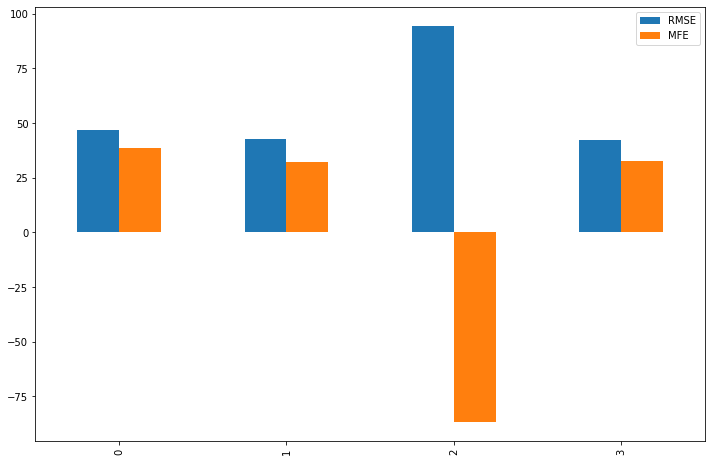

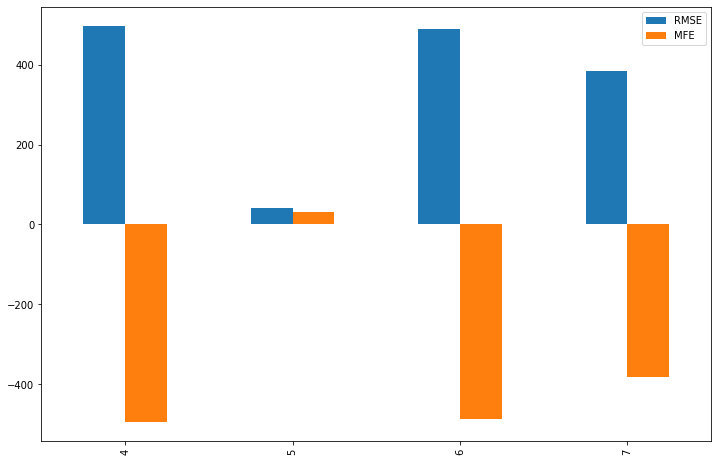

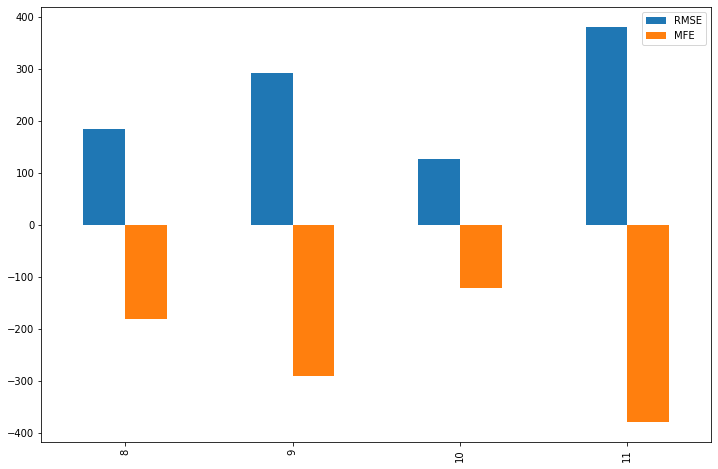

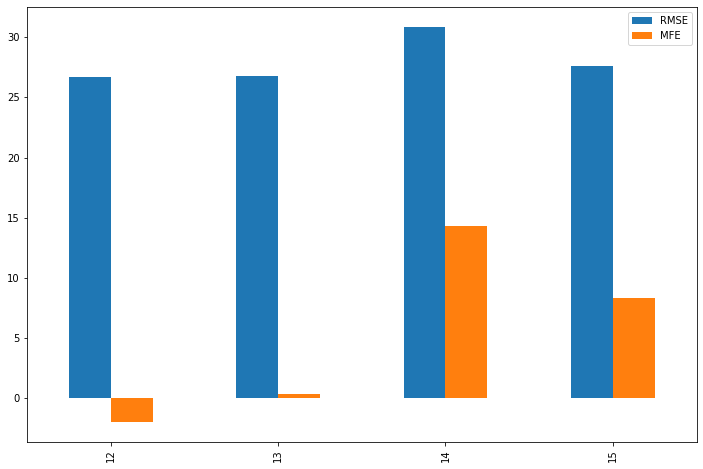

In [18]:
(grouped[['RMSE','MFE']]
 .pipe(lambda g: g.plot.bar(figsize=(12, 8)))
)